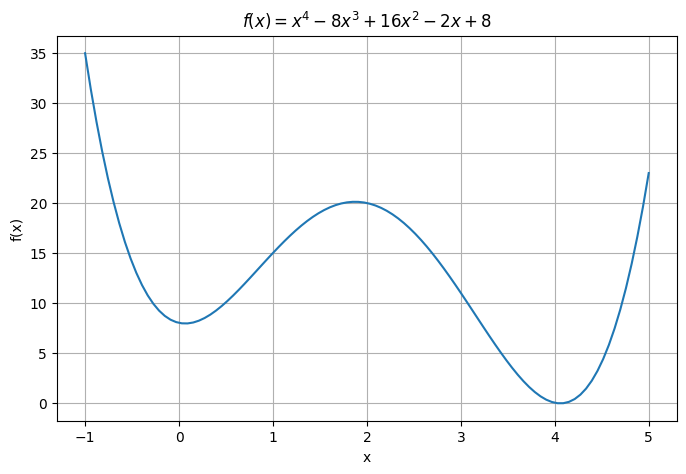

In [2]:
# draw a function f(x) = x^4-8x^3+16x^2-2x+8
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 5, 100)
# y = x**4 - 8*x**3 + 16*x**2 - 2*x + 
# f = lambda x: x**4 - 8*x**3 + 16*x**2 - 2*x + 8

def f(x):
    return x ** 4 - 8 * x ** 3 + 16 * x ** 2 - 2 * x + 8  # return 是指定 def 的返回值
y = f(x)

fig = plt.figure(figsize=(8, 5))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x) = x^4-8x^3+16x^2-2x+8$')
plt.grid()
plt.show()

mu: 0.10710710710710702 max_L: -134.05228102462502


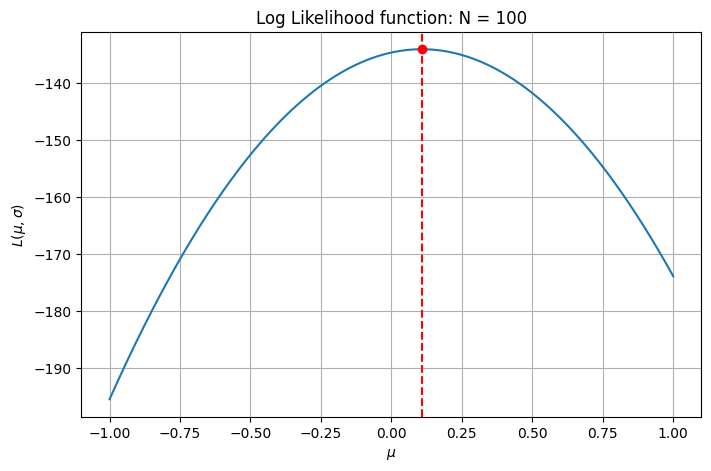

mle_mu: 0.10782142273295721


In [3]:
# use scipy to generate N samples from Normal Distribution with mu = 0 and sigma = 1

# import scipy.stats as stats
from scipy.stats import norm
N = 100
mu = 0
sigma = 1

x = norm.rvs(loc = mu, scale = sigma, size = N)

# compute the joint likelihood of N samples for different values of mu and sigma
def L(x, mu, sigma):
    return norm.pdf(x, loc = mu, scale = sigma)

# draw the likelihood function
mu = np.linspace(-1, 1, 1000)
sigma = 1
L_mu_sigma = np.zeros(len(mu))
for i in range(len(mu)):
    L_mu_sigma[i] = np.sum(np.log(L(x, mu[i], sigma)))
    # L[i] = np.prod(L(x, mu[i], sigma))  # 沒取 log 的版本

max_L_index = np.argmax(L_mu_sigma)
print('mu:', mu[max_L_index], 'max_L:', L_mu_sigma[max_L_index])

plt.figure(figsize=(8, 5))
plt.plot(mu, L_mu_sigma)
plt.plot(mu[max_L_index], L_mu_sigma[max_L_index], 'ro')
# draw a vertical line at the maximum joint likelihood
plt.axvline(x = mu[max_L_index], color = 'r', linestyle = '--')
plt.xlabel('$\mu$')
plt.ylabel('$L(\mu, \sigma)$')
plt.title('Log Likelihood function: N = {}'.format(N))
plt.grid()
plt.show()
# 可見 L(mu, sigma) 的值很小，當提高 sample 時，圖形會變成一條線，因為 L 太小了電腦無法處理，所以才要取 log

# 下面是理論的 mle 算法，上面的做法叫做 grid search
mle_mu = x.mean()
print('mle_mu:', mle_mu)


有時間可以重複做上面的實驗 50000 次，得到 50000 個 mu，然後看 variation，和取 mu

看老師的講義做

In [63]:
# 寫一支 function 來計算 log likelihood function

def log_likelihood(x, mu, sigma):
    return np.sum(np.log(norm.pdf(x, loc = mu, scale = sigma)))

mu: -0.1451451451451452 max_log_L: -149.26610999027938


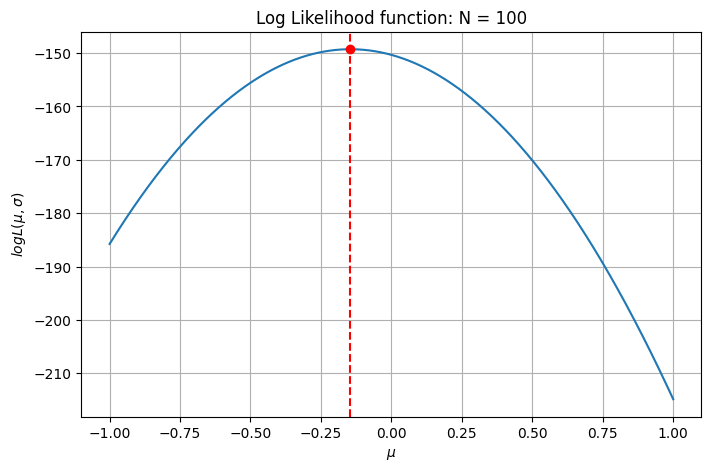

In [64]:
# 用上面的 function 來計算 mu = 0, sigma = 1 的 log likelihood，並畫圖

mu = np.linspace(-1, 1, 1000)
sigma = 1
log_L_mu_sigma = np.zeros(len(mu))
for i in range(len(mu)):
    log_L_mu_sigma[i] = log_likelihood(x, mu[i], sigma)

max_log_L_index = np.argmax(log_L_mu_sigma)
print('mu:', mu[max_log_L_index], 'max_log_L:', log_L_mu_sigma[max_log_L_index])

plt.figure(figsize=(8, 5))
plt.plot(mu, log_L_mu_sigma)
plt.plot(mu[max_log_L_index], log_L_mu_sigma[max_log_L_index], 'ro')
plt.axvline(x = mu[max_log_L_index], color = 'r', linestyle = '--')
plt.xlabel('$\mu$')
plt.ylabel('$log L(\mu, \sigma)$')
plt.title('Log Likelihood function: N = {}'.format(N))
plt.grid()
plt.show()

In [180]:
# 利用演算法計算最大概似估計值，sigma 固定為 1

from scipy.optimize import minimize
from scipy.stats import norm
N = 100
mu = 0
sigma = 1

x = norm.rvs(loc = mu, scale = sigma, size = N)

def log_likelihood(x, mu, sigma):
    return np.sum(np.log(norm.pdf(x, loc = mu, scale = sigma)))

def minus_log_likelihood(mu):
    return -log_likelihood(x, mu, sigma)  # minimize 只能最小化，所以加個負號, 這樣就變成最大化(沒有最大化的指令)

result = minimize(minus_log_likelihood, 0)  # minimize 第一個參數是要最小化的函數，第二個參數是初始值
print(result)
mle_mu = result.x[0]
print('mle_mu:', mle_mu)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 144.00137322081602
        x: [-4.834e-02]
      nit: 1
      jac: [ 1.907e-06]
 hess_inv: [[1]]
     nfev: 6
     njev: 3
mle_mu: -0.048339865671350624


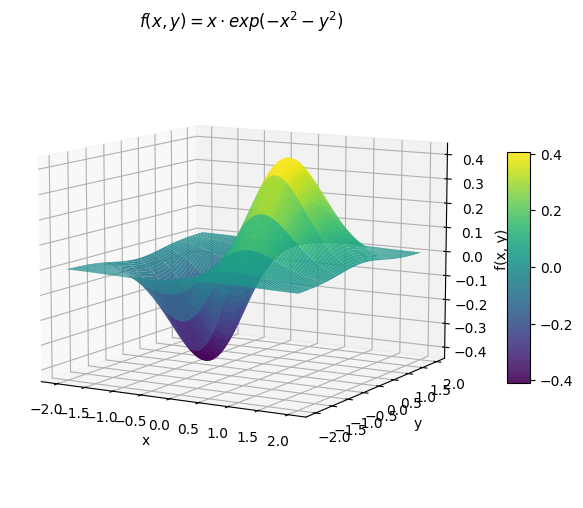

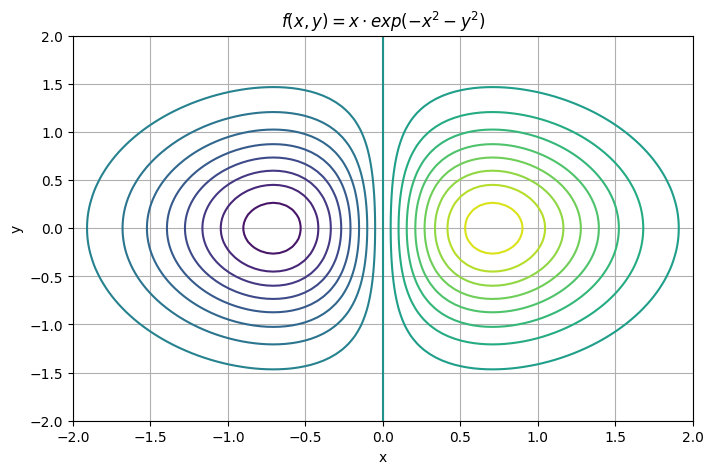

In [1]:
# draw a mesh grid for f(x, y) = x*exp(-x^2 - y^2)
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = X * np.exp(-X**2 - Y**2)

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9, rstride = 10, cstride = 1) # rstride, cstride 是指定 row, column 的間隔
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10) # aspect = length/width ratio
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.view_init(10, -60)  # 調整視角, 第一個參數是上下，第二個參數是左右
plt.title('$f(x, y) = x \cdot exp(-x^2 - y^2)$')
plt.show()

# draw a contour plot for f(x, y) = x*exp(-x^2 - y^2)
fig = plt.figure(figsize=(8, 5))
plt.contour(X, Y, Z, levels = 20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$f(x, y) = x \cdot exp(-x^2 - y^2)$')
plt.grid()
plt.ion()
plt.show()